In [5]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 38.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 36.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.1/301.1 kB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 41.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 16.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 34.5 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.0
    Uninstalling numpy-1.19.0:
      Successfully uninstalled numpy-1.19.0


In [6]:
import matplotlib
from matplotlib import pyplot

ImportError: Matplotlib requires numpy>=1.20; you have 1.19.0

In [1]:
import numpy as np
import ujson
import pandas as pd
import itertools

In [3]:
!pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.7/20.7 MB 36.9 MB/s eta 0:00:0000:0100:01


In [4]:
import rasterio
import requests

In [18]:
from math import pi,sqrt,sin,cos,atan2

def haversine(pos1, pos2):
    lat1 = float(pos1[0])
    long1 = float(pos1[1])
    lat2 = float(pos2[0])
    long2 = float(pos2[1])

    degree_to_rad = float(pi / 180.0)

    d_lat = (lat2 - lat1) * degree_to_rad
    d_long = (long2 - long1) * degree_to_rad

    a = pow(sin(d_lat / 2), 2) + cos(lat1 * degree_to_rad) * cos(lat2 * degree_to_rad) * pow(sin(d_long / 2), 2)
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    km = 6367 * c
    mi = 3956 * c

    return km

In [7]:
def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)
    
    All args must be of equal length.    
    
    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    
    c = 2 * np.arcsin(np.sqrt(a))
    km = 6378.137 * c
    return km

In [8]:
south_latmin = 43.7247599
north_latmax = 43.7519311
west_lonmin = 7.4090279
east_lonmax = 7.4398704

In [9]:
path = f'https://portal.opentopography.org/API/globaldem?demtype=COP30&south={south_latmin}&north={north_latmax}&west={west_lonmin}&east={east_lonmax}&outputFormat=GTiff&API_Key=demoapikeyot2022'
result = requests.get(path)

with open('monaco.geotiff','wb') as opened:
    opened.write(result.content)

In [5]:
import osrmbindings

In [6]:
osrmbindings.initialize('/3wheeler/monaco-latest')

In [2]:
st = pd.read_excel('data/customer_data.xlsx')

In [3]:
st

,N,lon,lat,id,fclass,Name,Zone,Demand,Time Windows
0,1,7.425203,43.732781,267901435,restaurant,Stars ‚Äôn‚Äô Bars,West,4,NaN
1,2,7.423927,43.732524,267901573,restaurant,Quai des Artistes,West,5,NaN
2,3,7.420386,43.732403,274500242,restaurant,Pizzeria Mon√©gasque,West,6,NaN
3,4,7.422148,43.733820,321647302,restaurant,Brasserie de Monaco,West,6,NaN
4,5,7.421410,43.733930,954710927,restaurant,Chez Edgar,West,3,NaN
...,...,...,...,...,...,...,...,...,...
82,83,7.429562,43.742286,7926333297,restaurant,Mozza,East,1,NaN
83,84,7.429690,43.742246,7926333298,restaurant,Cozza,East,4,NaN
84,85,7.430252,43.739527,8176182650,restaurant,Horizon Deck,East,6,NaN
85,86,7.428925,43.737572,8269648743,restaurant,Soci√©t√© Nautique,East,2,NaN


In [12]:
with rasterio.open('monaco.geotiff') as opened:
    alt = opened.read()[0] #only one channel to extract, result is a xy array

In [4]:
perms_iter = itertools.permutations(st.index, 2)

In [5]:
full_perms = list(perms_iter)

In [6]:
perms = full_perms

In [7]:
!pip install icecream

In [8]:
len(perms)

7482

In [10]:
import osrm

In [12]:
py_osrm = osrm.OSRM(storage_config='/3wheeler/monaco-latest', use_shared_memory=False)
#py_osrm = osrm.OSRM(storage_config="pyosrm/tests/data/ch/monaco-latest.osrm", use_shared_memory=False)

In [59]:
# Declare Route Parameters
route_params = osrm.RouteParameters(coordinates = [(7.41337, 43.72956), (7.41546, 43.73077)])

# Pass it into the py_osrm instance
res = py_osrm.Route(route_params)

# Print out result output
print(res["waypoints"])
print(res["routes"])

[{'hint': 'DwQAgBEEAIAIAAAAAAAAAA0AAAASAAAA0zW1QAAAAAB8RhBBC0NHQQgAAAAAAAAADQAAABIAAAAmAAAAoh5xAGFCmwJ6HnEAmEKbAgEA3wORKc62', 'distance': 6.908744, 'name': '', 'location': [7.413410, 43.729505]}, {'hint': 'XgAAgPoBAIAtAAAAFQAAAM8AAAAAAAAAo6dIQrjVukE9FGVDAAAAAC0AAAAVAAAAzwAAAAAAAAAmAAAAKydxAN9GmwKkJnEAUkebAgoAHwORKc62', 'distance': 16.780465, 'name': 'Avenue de Fontvieille', 'location': [7.415595, 43.730655]}]
[{'geometry': 'm|{iGy|fl@NZW^GZs@K[YUi@gAsE}D{HkBkCAQGCGF?NLNdAx@ZNhAF~@lAXj@', 'legs': [{'steps': [], 'summary': '', 'weight': 62.200000, 'duration': 62.200000, 'distance': 667.400000}], 'weight_name': 'routability', 'weight': 62.200000, 'duration': 62.200000, 'distance': 667.400000}]


In [44]:
res['routes'][0]['duration']

62.2

In [35]:
# Declare Route Parameters
route_params = osrm.RouteParameters(coordinates = [(7.41337, 43.72956), (7.41546, 43.73077)], 
                                    geometries='geojson', overview='full', annotations=[], steps=False)

# Pass it into the py_osrm instance
res = py_osrm.Route(route_params)

# Print out result output
#print(res["waypoints"])
print(res["routes"])

[{'geometry': {'coordinates': [[7.413410, 43.729505], [7.413348, 43.729481], [7.413267, 43.729425], [7.413106, 43.729550], [7.413054, 43.729565], [7.412969, 43.729589], [7.412984, 43.729699], [7.413006, 43.729784], [7.413032, 43.729853], [7.413103, 43.729935], [7.413155, 43.729988], [7.413201, 43.730022], [7.413252, 43.730053], [7.413306, 43.730080], [7.413365, 43.730102], [7.414022, 43.730320], [7.414092, 43.730335], [7.414168, 43.730359], [7.414267, 43.730392], [7.414372, 43.730431], [7.414428, 43.730456], [7.414485, 43.730488], [7.414674, 43.730595], [7.414784, 43.730661], [7.414879, 43.730729], [7.415139, 43.730890], [7.415487, 43.731091], [7.415568, 43.731152], [7.415664, 43.731212], [7.415707, 43.731242], [7.415769, 43.731263], [7.415806, 43.731281], [7.415921, 43.731358], [7.416005, 43.731411], [7.416049, 43.731463], [7.416090, 43.731486], [7.416482, 43.731779], [7.416710, 43.731950], [7.416721, 43.731946], [7.416733, 43.731944], [7.416745, 43.731943], [7.416757, 43.731944], [7.

In [ ]:
>>> route_params = osrm.RouteParameters(
        coordinates = [(7.41337, 43.72956), (7.41546, 43.73077)],
        steps = True,
        number_of_alternatives = 3,
        annotations = ['speed'],
        geometries = 'polyline',
        overview = 'simplified',
        continue_straight = False,
        waypoints = [0, 1],
        radiuses = [4.07, 4.07],
        bearings = [(200, 180), (250, 180)],
        # approaches = ['unrestricted', 'unrestricted'],
        generate_hints = False,
        exclude = ['motorway'],
        snapping = 'any'
    )

In [16]:
from icecream import ic

In [ ]:
route_params = osrm.RouteParameters(coordinates = [(location1[1], location1[0]), (location2[1], location2[0])], 
                                    geometries='geojson', overview='full', annotations=[], steps=False)

            # Pass it into the py_osrm instance
            response = py_osrm.Route(route_params)

In [52]:
!pip install pyosrm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 21.9 MB/s eta 0:00:00a 0:00:01


In [61]:
import pyosrm as posrm
router = posrm.PyOSRM(path='/wheelbarrow/monaco-latest', algorithm='CH')

ValueError: You need either a valid path or use_shared_memory True

In [64]:
!pip uninstall -y pyosrm

Found existing installation: pyosrm 0.0.2
Uninstalling pyosrm-0.0.2:
  Successfully uninstalled pyosrm-0.0.2


In [9]:
!git clone https://github.com/enricodvn/pyosrm.git

Cloning into 'pyosrm'...
remote: Enumerating objects: 185, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 185 (delta 22), reused 20 (delta 20), pack-reused 157
Receiving objects: 100% (185/185), 990.02 KiB | 8.18 MiB/s, done.
Resolving deltas: 100% (75/75), done.


In [10]:
!pip install cython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 17.7 MB/s eta 0:00:0000:0100:01


In [11]:
!cd pyosrm && pip install .

Processing /pyosrm
  Preparing metadata (setup.py) ... done
  Created wheel for pyosrm: filename=pyosrm-0.0.2-cp38-cp38-linux_x86_64.whl size=1569646 sha256=5860c6df537e206c8d1b55f3b55147bd14c9f2f986bc3b0d2bd5b9e6fcaa0f29
  Stored in directory: /tmp/pip-ephem-wheel-cache-o6kg4kii/wheels/d9/d4/15/18df54d846b356f61c29849d4f517bd78c167276d2b17ef391
Successfully built pyosrm


In [12]:
import pyosrm

In [13]:
from pyosrm import PyOSRM, Status
router = PyOSRM("pyosrm/tests/data/ch/monaco-latest.osrm", algorithm='CH')

RuntimeError: File is incompatible with this version of OSRM: pyosrm/tests/data/ch/monaco-latest.osrm.ebg_nodes prepared with OSRM 5.22.0 but this is v5.28.0 (at include/storage/tar.hpp:201)

In [22]:
from pyosrm import PyOSRM, Status
router = PyOSRM("/monaco-latest", algorithm='CH')

RuntimeError: Required files are missing, cannot continue. Have all the pre-processing steps been run? Missing files: /monaco-latest.osrm.datasource_names, /monaco-latest.osrm.ebg_nodes, /monaco-latest.osrm.edges, /monaco-latest.osrm.fileIndex, /monaco-latest.osrm.geometry, /monaco-latest.osrm.icd, /monaco-latest.osrm.maneuver_overrides, /monaco-latest.osrm.names, /monaco-latest.osrm.nbg_nodes, /monaco-latest.osrm.properties, /monaco-latest.osrm.ramIndex, /monaco-latest.osrm.timestamp, /monaco-latest.osrm.tld, /monaco-latest.osrm.tls, /monaco-latest.osrm.turn_duration_penalties, /monaco-latest.osrm.turn_weight_penalties

In [28]:
from pyosrm import PyOSRM, Status
router = PyOSRM("/monaco-latest", algorithm='CH')

In [29]:
result = router.route([[7.419758, 43.731142], [7.419505, 43.736825]])

In [30]:
result.json()['routes']

[{'distance': 1717.8,
  'duration': 135.9,
  'legs': [{'steps': [],
    'distance': 1717.8,
    'duration': 135.9,
    'summary': ''}],
  'geometry': 'ch|iGuchl@aAcFo@gIb@lNRpNZlCEVSH{@m@z@iA^BDc@OQQDU_@_A_DmAmCSJ?dAmAvFYBuAm@]@kBj@a@v@uBDgAe@eBcB[q@e@eCaCgD',
  'weight_name': 'routability',
  'weight': 135.9}]

In [38]:
def calculate_elevation_costs(perms, customers):
    elevation_cost = np.zeros((len(st),len(st)))

    locations = customers[['lat','lon']].values
    
    total_duration = 0
    for source, destination in perms:

        location1 = locations[source]
        location2 = locations[destination]
        lats = [location1[0], location2[0]]
        lons = [location1[1], location2[1]]

        result = router.route([(location1[1], location1[0]), (location2[1], location2[0])]).json()['routes'][0]
        total_duration += result['duration']
        continue
        #response = osrmbindings.route(lons, lats)
        #parsed = ujson.loads(response )
        coords = np.array(parsed['routes'][0]['geometry']['coordinates'])
        ys = coords[:,1]
        xs = coords[:,0]

        ys0 = ys[0:-1]
        ys1 = ys[1:]
        xs0 = xs[0:-1]
        xs1 = xs[1:]
        rows, cols = rasterio.transform.rowcol(src.transform, xs, ys)

        elevation_along_route = alt[rows,cols]

        distances = haversine_np(xs0, ys0, xs1, ys1)
        travelled = np.cumsum(distances)
        change = np.diff(elevation_along_route/1000)/distances # meters to km, elevation change per distance unit

        cost = np.max(change)
        elevation_cost[source, destination] = cost
    print(total_duration)
    return elevation_cost

In [42]:
def calculate_elevation_costs(perms, customers):
    elevation_cost = np.zeros((len(st),len(st)))

    locations = customers[['lat','lon']].astype(np.float32).values
    total_duration = 0
    #with rasterio.open('monaco.geotiff') as src:
    for source, destination in perms:

        location1 = locations[source]
        location2 = locations[destination]
        lats = [location1[0], location2[0]]
        lons = [location1[1], location2[1]]

        #print([(location1[1], location1[0]), (location2[1], location2[0])])
        #print([(7.41337, 43.72956), (7.48546, 43.73077)])
        
        #coords = [(7.4252031, 43.7327806), (7.4239272, 43.7325243)]
        coords = [(float(location1[1]), float(location1[0])), (float(location2[1]), float(location2[0]))]
        
        route_params = osrm.RouteParameters(coordinates = coords, geometries='geojson', overview='full', annotations=[], steps=False)
        #route_params = osrm.RouteParameters(coordinates = [(7.4252031, 43.7327806), (7.4239272, 43.7325243)], geometries='geojson', overview='simplified', annotations=[], steps=False)
        #route_params = osrm.RouteParameters(coordinates = [(location1[1], location1[0]), (location2[1], location2[0])],geometries='geojson', overview='simplified', annotations=[], steps=False)
        #route_params = osrm.RouteParameters(coordinates = [(7.41337, 43.72956), (7.48546, 43.73077)] ,geometries='geojson', overview='simplified', annotations=[], steps=False)
        
        # Pass it into the py_osrm instance
        parsed = py_osrm.Route(route_params)
        total_duration += parsed['routes'][0]['duration']
        continue
        #response = osrmbindings.route(lons, lats)
        #parsed = ujson.loads(response )
        coords = np.array(parsed['routes'][0]['geometry']['coordinates'])
        ys = coords[:,1]
        xs = coords[:,0]

        ys0 = ys[0:-1]
        ys1 = ys[1:]
        xs0 = xs[0:-1]
        xs1 = xs[1:]
        rows, cols = rasterio.transform.rowcol(src.transform, xs, ys)

        elevation_along_route = alt[rows,cols]

        distances = haversine_np(xs0, ys0, xs1, ys1)
        travelled = np.cumsum(distances)
        change = np.diff(elevation_along_route/1000)/distances # meters to km, elevation change per distance unit

        cost = np.max(change)
        elevation_cost[source, destination] = cost
    print(total_duration)
    return elevation_cost

In [86]:
tuple((1,2))

(1, 2)

In [196]:
def calculate_elevation_costs(perms, customers):
    elevation_cost = np.zeros((len(st),len(st)))

    locations = customers[['lat','lon']].values
    
    with rasterio.open('monaco.geotiff') as src:
        for source, destination in perms:
            
            location1 = locations[source]
            location2 = locations[destination]
            lats = [location1[0], location2[0]]
            lons = [location1[1], location2[1]]
            
            response = osrmbindings.route(lons, lats)
            parsed = ujson.loads(response)
            coords = np.array(parsed['routes'][0]['geometry']['coordinates'])
            ys = coords[:,1]
            xs = coords[:,0]
            
            ys0 = ys[0:-1]
            ys1 = ys[1:]
            xs0 = xs[0:-1]
            xs1 = xs[1:]
            rows, cols = rasterio.transform.rowcol(src.transform, xs, ys)

            elevation_along_route = alt[rows,cols]

            distances = haversine_np(xs0, ys0, xs1, ys1)
            travelled = np.cumsum(distances)
            change = np.diff(elevation_along_route/1000)/distances # meters to km, elevation change per distance unit

            cost = np.max(change)
            elevation_cost[source, destination] = cost
        return elevation_cost

In [36]:
locations = st[['lat','lon']].astype(np.float32).values

In [37]:
locations.dtype

dtype('float32')

In [39]:
%%time
costs = calculate_elevation_costs(perms, st)

1549195.7000000004
CPU times: user 2.01 s, sys: 7.6 ms, total: 2.02 s
Wall time: 2.01 s


In [43]:
%%time
costs = calculate_elevation_costs(perms, st)

1549230.0999999999
CPU times: user 3 s, sys: 0 ns, total: 3 s
Wall time: 3 s


In [150]:
%%timeit
costs = calculate_elevation_costs(perms, st)

649 ms ± 9.26 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [56]:
(700**2)/7000

70.0

In [57]:
8*70

560

In [58]:
560/60

9.333333333333334

In [86]:
37/2.6

14.23076923076923

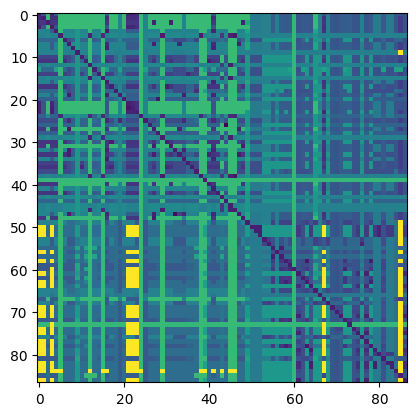

In [211]:
pyplot.imshow(costs)

In [213]:
np.save('elevation.costs.npy', costs)

In [30]:
!pip install line_profiler

     |████████████████████████████████| 675 kB 7.5 MB/s eta 0:00:01


In [31]:
%load_ext line_profiler

In [184]:
%lprun -f calculate_elevation_costs calculate_elevation_costs(perms, st)

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import sys
import json
import argparse
import time

import build_time_dist_matrix
import optimization
import visualization
import schedule
import upload_results
import manual_viz



with open('data/config.json', 'r') as opened:
    config = json.load(opened)

In [ ]:

    
print(' *   Building Time/Distance Matrices')
#check if node_loader_options are specified
if 'node_loader_options' in config.keys():
    node_data = build_time_dist_matrix.process_nodes(config['node_loader_options'], config['zone_configs'])
else:
    node_data = build_time_dist_matrix.process_nodes()

print(f' *   Starting Model Run at {time.strftime("%H:%M:%S")} (UTC)')

routes_for_mapping_viz, vehicles_viz, zone_route_map = optimization.main(node_data, config)

visualization.main(routes_for_mapping_viz, vehicles_viz, zone_route_map)



In [ ]:
import datetime
import matplotlib
from matplotlib import pyplot
import numpy as np
import pandas as pd

In [ ]:
pyplot.rcParams["figure.figsize"] = [3,7]
for route in route_dict:
    distances = [0]+route_dict[route]['current_distance'][:-1]
    times = route_dict[route]['time']
    distances = np.array(distances).cumsum()
    times = np.array(times)

    y_ticks = [f'{name} - {datetime.timedelta(seconds=float(one_time))}' for one_time,name in zip(times,route_dict[route]['current_names'])]
    pyplot.yticks(ticks=times, labels=y_ticks)
    pyplot.plot(distances, times, marker='o')
    pyplot.show()

In [ ]:
pyplot.rcParams["figure.figsize"] = [3,7]
for route in route_dict:
    distances = pd.Series(route_dict[route]['travel_time']).shift(1).values[1:]
    times = pd.Series(route_dict[route]['time']).diff()[1:]-150
    times = (times-distances)
    times = [int(t) for t in times]
    #distances = np.array(distances).cumsum()
    times = np.array(times)

    y_ticks = [f'{name[0]} to {name[1]} - {datetime.timedelta(seconds=float(one_time))}' for one_time,name in zip(times,zip(route_dict[route]['current_names'], route_dict[route]['next_names']))]
    pyplot.yticks(ticks=times, labels=y_ticks)
    pyplot.plot(times, marker='o')
    #pyplot.plot(distances, marker='o')
    pyplot.show()